# Student Performance Indicator 

### Life Cycle of a Machine Learning Project 
- Understanding the Problem Statement <br>
- Data Collection <br>
- Data Checks to perform <br>
- Exploratory data analysis <br>
- Data Pre-Processing <br>
- Model Training <br>
- Choose best model <br>

## 1. Understanding the Problem Statement 
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. 

## 2. Data Collection 

- Source Link:  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("Data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information 

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
math_full = df[df['math score']== 100]['reading score'].count()

In [10]:
math_full

7

In [11]:
print(df['gender'].unique())

['female' 'male']


In [12]:
numerical_feature = [features for features in df.columns if df[features].dtype != 'O']

In [13]:
numerical_feature

['math score', 'reading score', 'writing score']

In [14]:
categorical_feature= [ features for features in df.columns if df[features].dtype == 'O']

In [15]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [23]:
df['Total Score'] = df['math score']+df['reading score']+df['writing score'] 
df['Average'] = df['Total Score']/3 

In [24]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


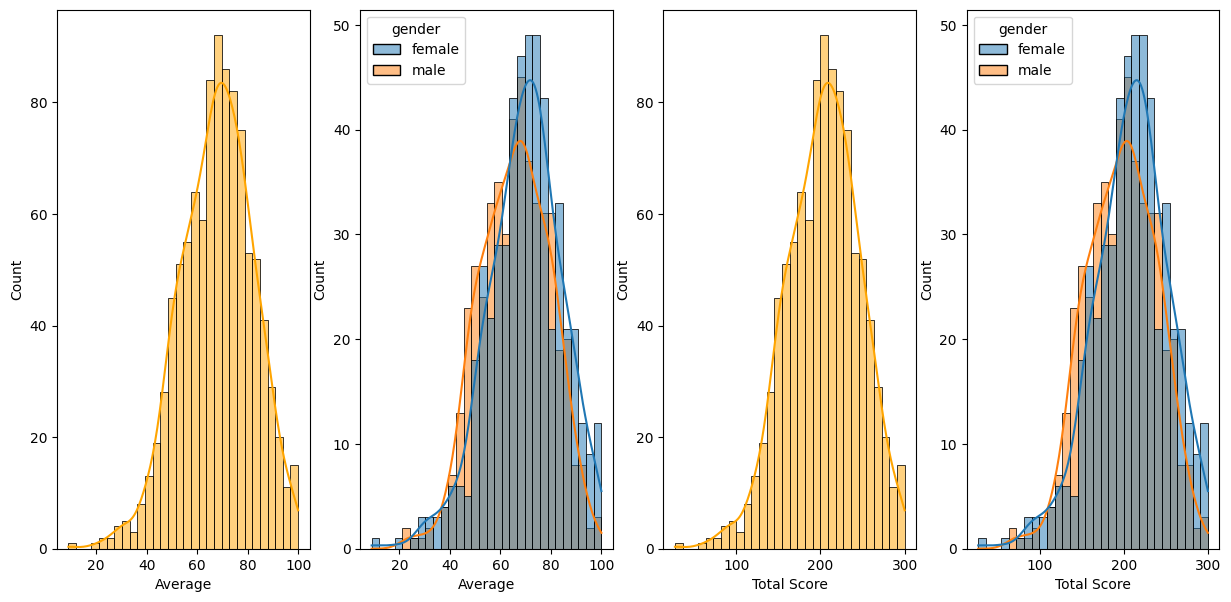

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(15,7)) 
plt.subplot(141) 
sns.histplot(data = df,x = 'Average',bins=30,color='orange',kde='True')
plt.subplot(142) 
sns.histplot(data = df,x = 'Average',bins = 30,kde = 'True',hue='gender')   
plt.subplot(143) 
sns.histplot(data = df,x = 'Total Score',bins=30,color='orange',kde='True') 
plt.subplot(144) 
sns.histplot(data = df,x = 'Total Score',bins = 30,kde = 'True',hue='gender') 
plt.show() 

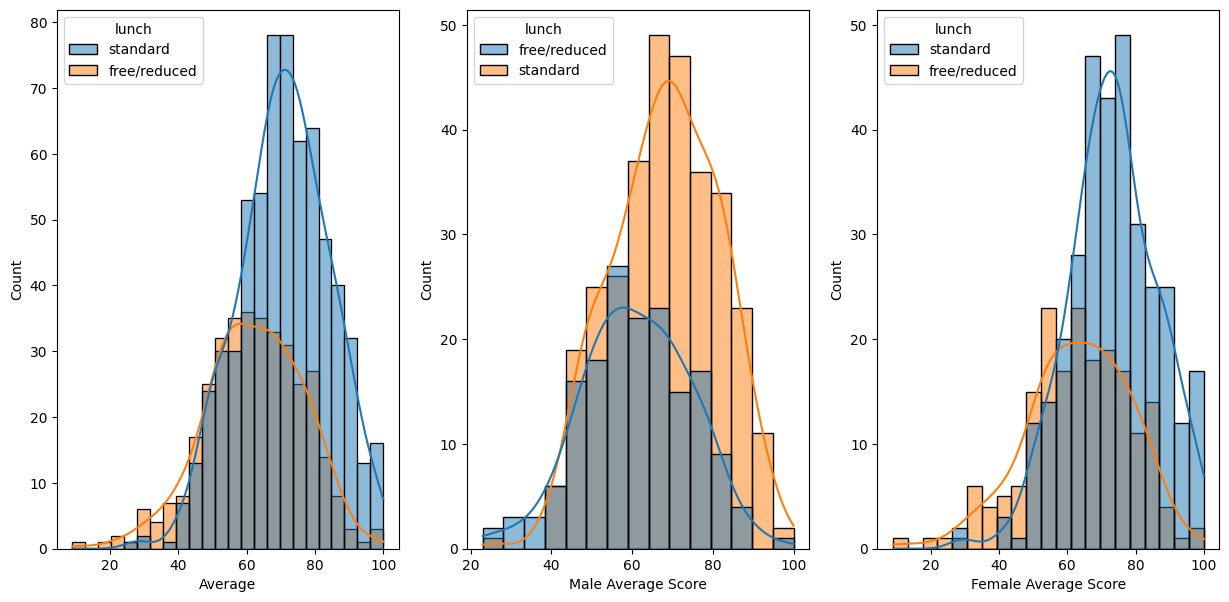

In [66]:
fig,axs = plt.subplots(1,3,figsize =(15,7)) 
plt.subplot(131) 
sns.histplot(data=df,x='Average',kde = True,hue= 'lunch') 
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'],x = 'Average',kde = True,hue='lunch') 
plt.xlabel('Male Average Score') 
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'],x = 'Average',kde = True,hue='lunch') 
plt.xlabel('Female Average Score')
plt.show()

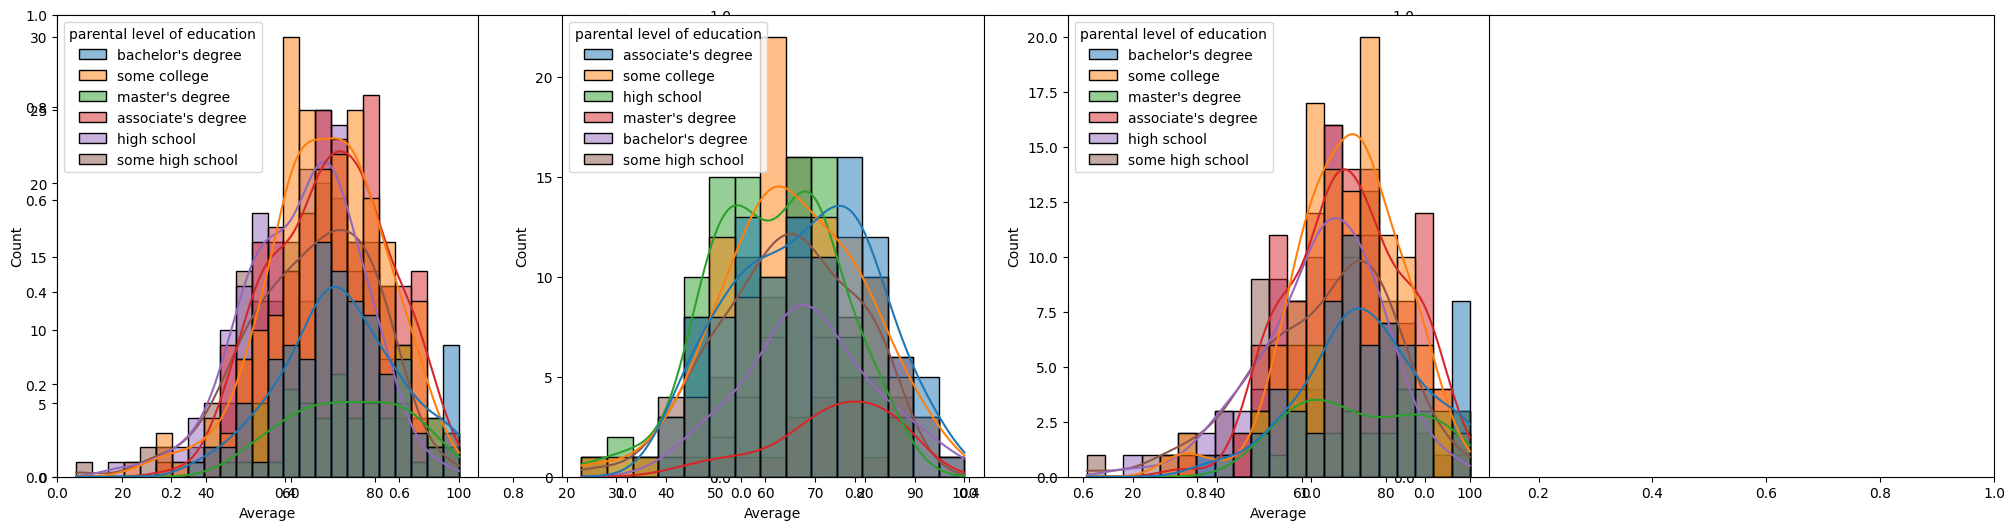

In [68]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

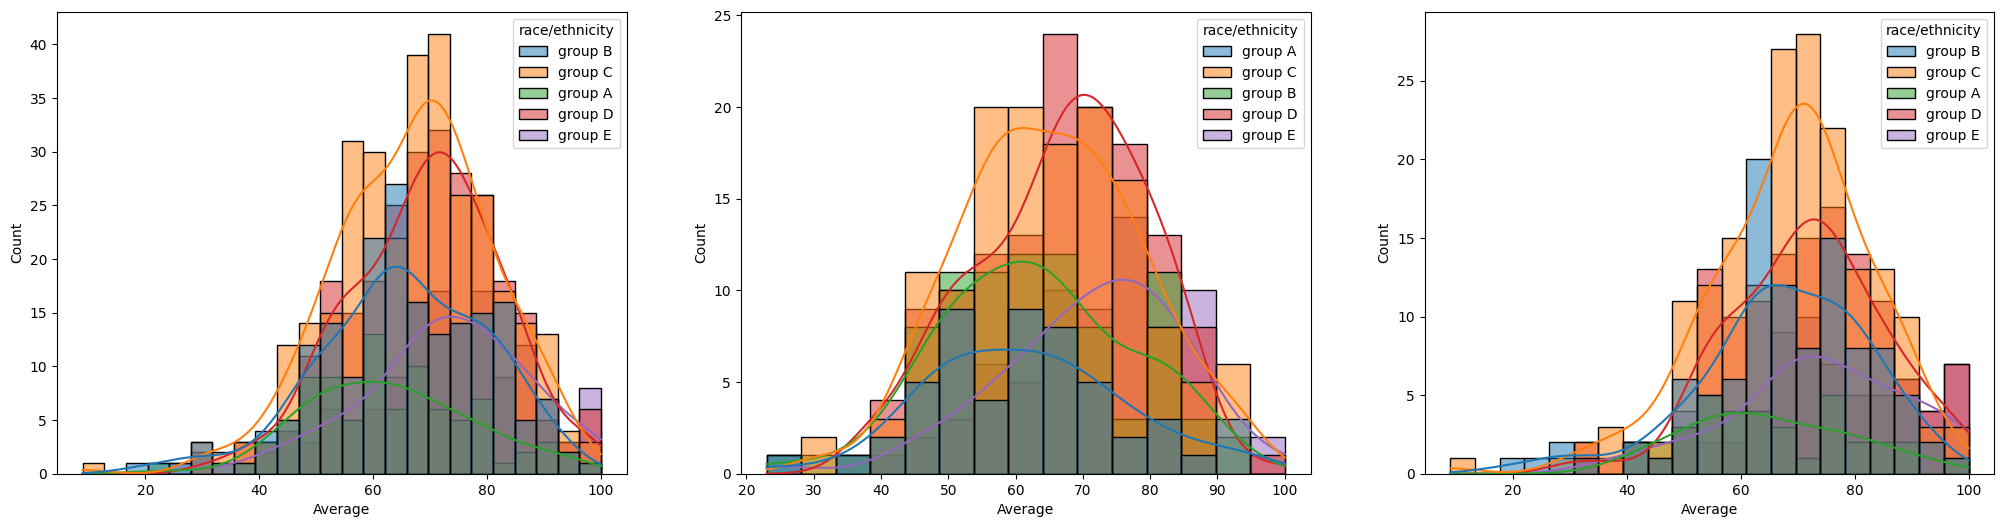

In [73]:
plt.subplots(1,3,figsize =(25,6)) 
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity') 
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'],x = 'Average',kde = True,hue = 'race/ethnicity')  
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'],x = 'Average',kde = True,hue = 'race/ethnicity') 
plt.show()

Text(0.5, 0, 'Reading Score')

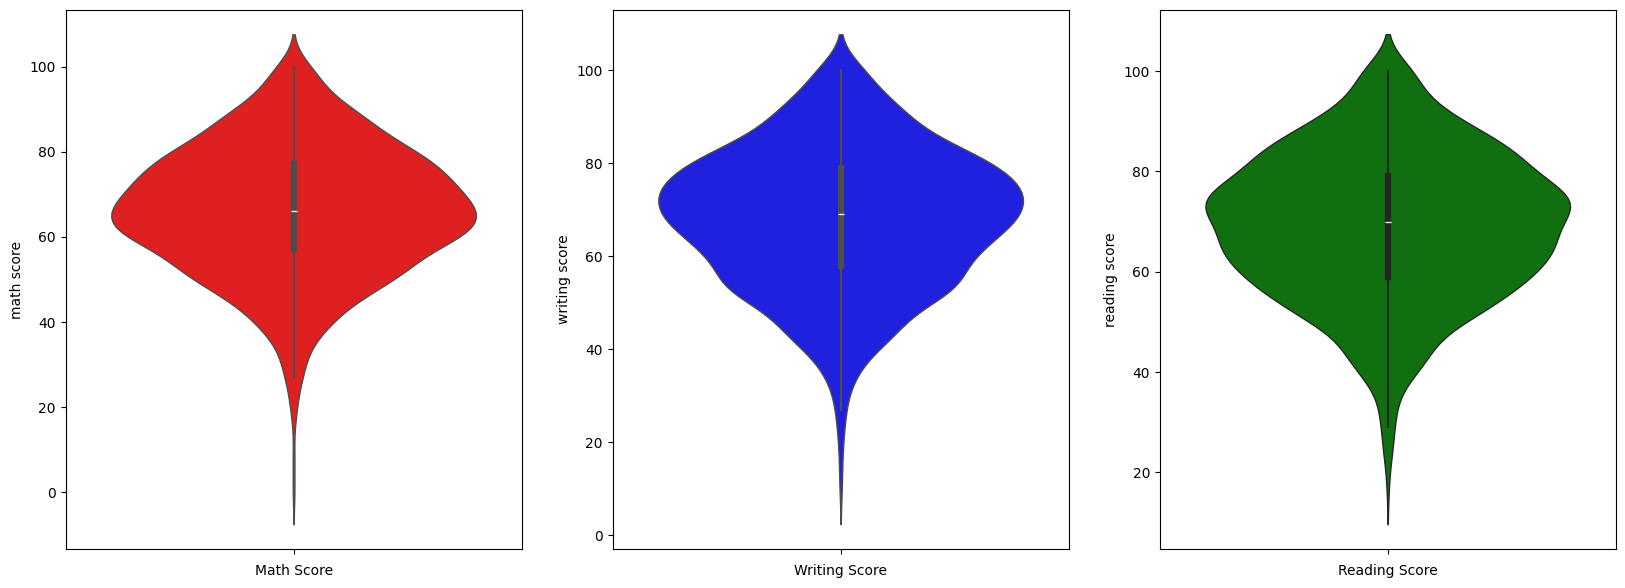

In [89]:
fig,axes = plt.subplots(1,3,figsize = (20,7))
plt.subplot(131)
sns.violinplot(data=df,y='math score',linewidth=1,color='red') 
plt.xlabel("Math Score") 
plt.subplot(132)
sns.violinplot(data=df,y='writing score',linewidth=1,color='blue') 
plt.xlabel("Writing Score") 
plt.subplot(133)
sns.violinplot(data=df,y='reading score',linewidth=1,color='green') 
plt.xlabel("Reading Score")

In [84]:
df[df['math score']<20]['Average'].count() 

4

Text(0.5, 1.0, 'test preparation course')

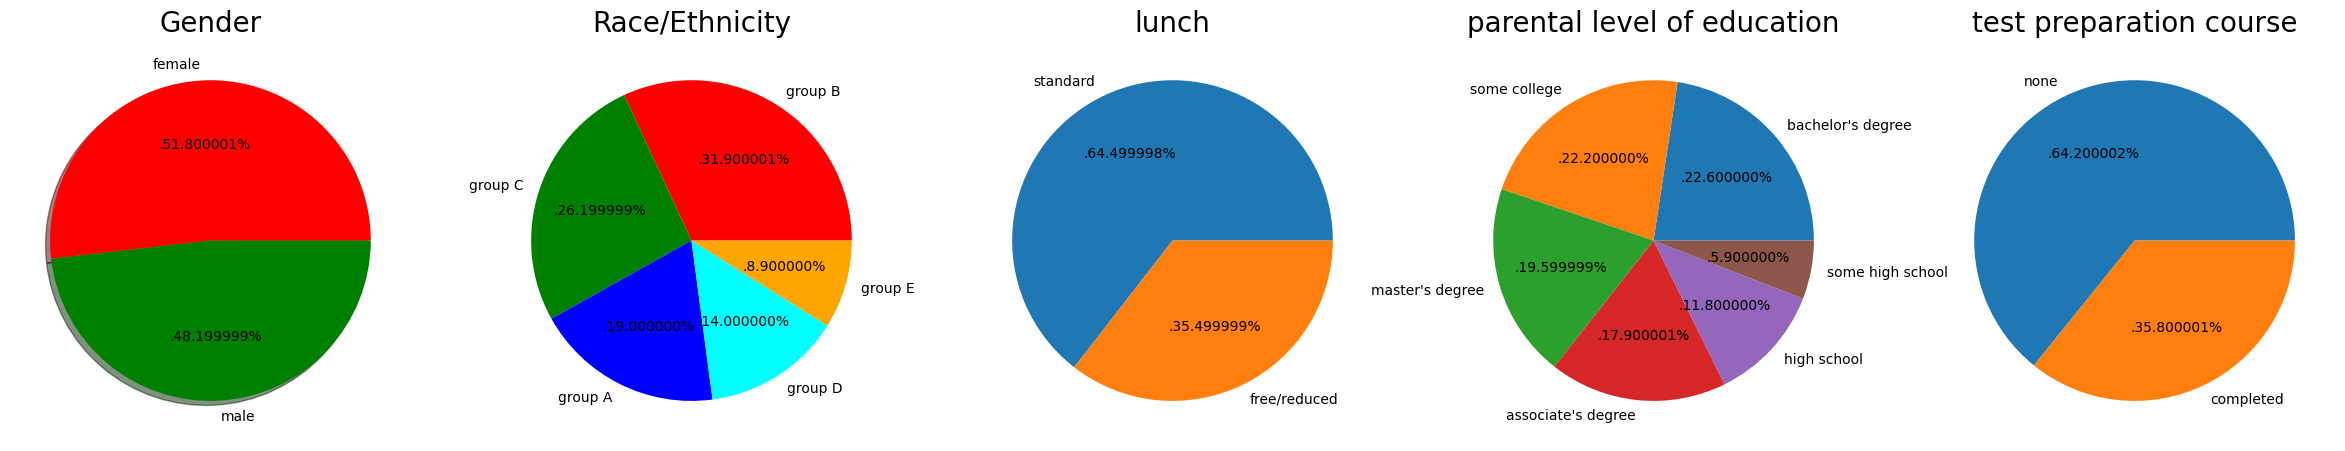

In [115]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = df['gender'].unique()
color = ['red','green']


plt.pie(size, colors = color, labels = labels,shadow=True,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off') 

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = df["race/ethnicity"].unique()
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off') 

plt.subplot(1,5,3)
size = df['lunch'].value_counts() 
labels = df['lunch'].unique() 
plt.pie(size,labels=labels,autopct = '.%2f%%')
plt.title('lunch',fontsize=20) 

plt.subplot(1,5,4)
size = df['parental level of education'].value_counts()
labels = df['parental level of education'].unique()
plt.pie(size,labels=labels,autopct = '.%2f%%') 
plt.title('parental level of education',fontsize = 20)

plt.subplot(1,5,5)
size = df["test preparation course"].value_counts()
labels = df['test preparation course'].unique()
plt.pie(size,labels=labels,autopct = '.%2f%%')
plt.title('test preparation course',fontsize = 20) 

In [95]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [103]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='Average', ylabel='Count'>

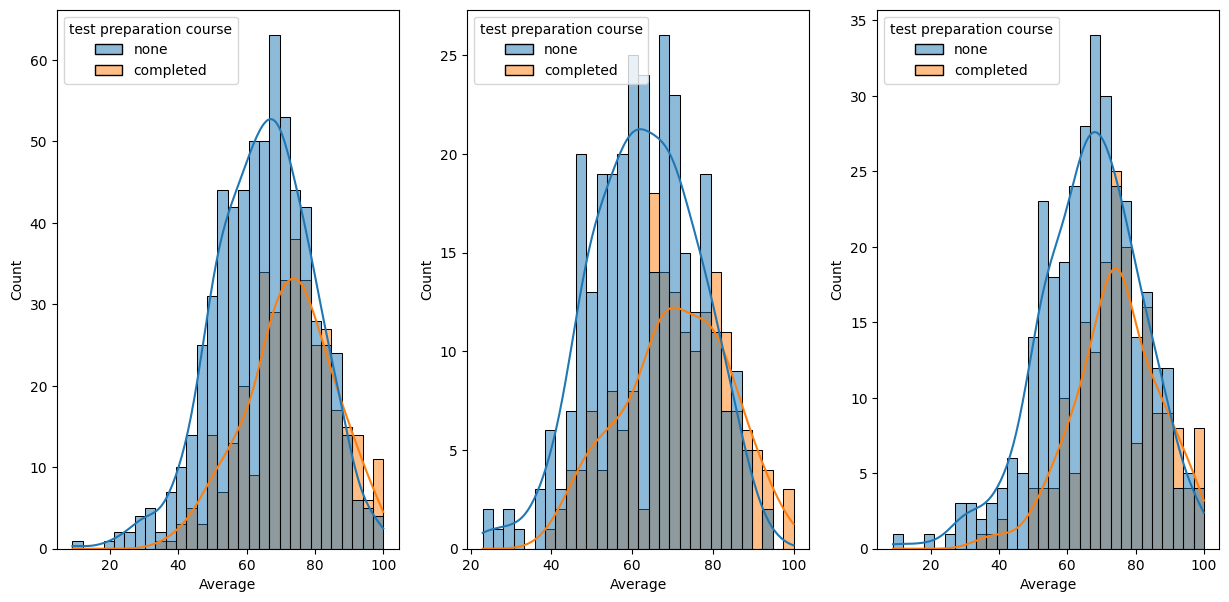

In [113]:
plt.subplots(1,3,figsize =(15,7)) 
plt.subplot(131)
sns.histplot(data= df,x= 'Average',bins=30,kde=True,hue="test preparation course")  
plt.subplot(132)
sns.histplot(data= df[df.gender == 'male'],x= 'Average',bins=30,kde=True,hue="test preparation course")  
plt.subplot(133)
sns.histplot(data= df[df.gender == 'female'],x= 'Average',bins=30,kde=True,hue="test preparation course") 

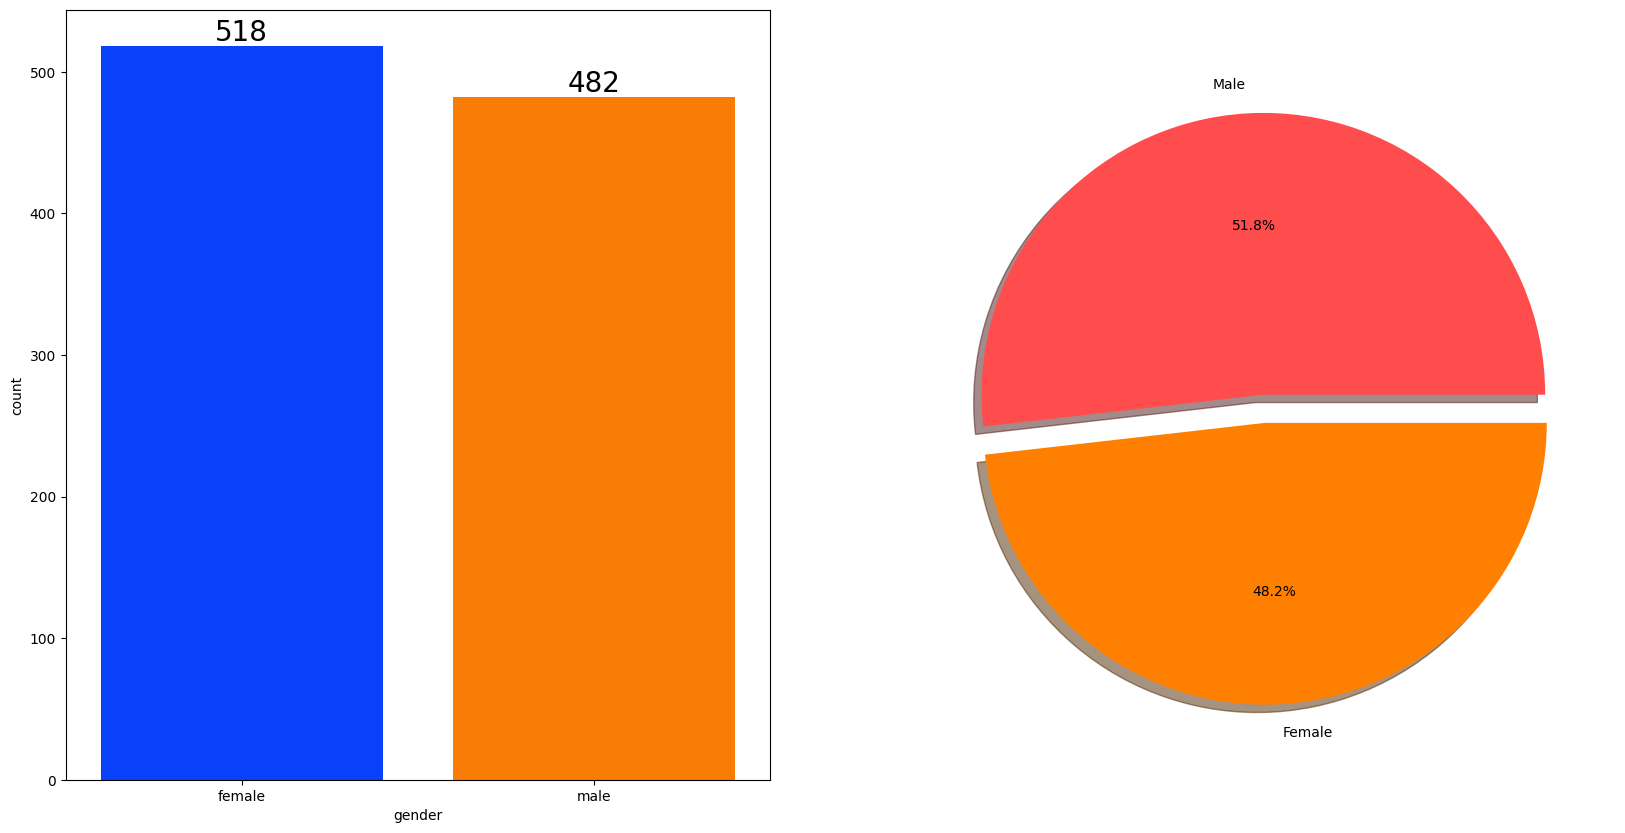

In [124]:
f,ax=plt.subplots(1,2,figsize=(20,10)) 
plt.subplot(121)
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.subplot(122)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show() 

In [139]:
gender_group = df.groupby('gender').mean(numeric_only=True)

In [140]:
gender_group

,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


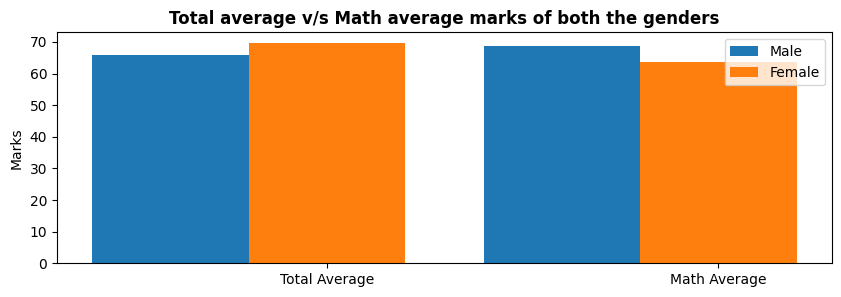

In [153]:
plt.figure(figsize=(10,3))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.4, male_scores, 0.4, label = 'Male')
plt.bar(X_axis , female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [154]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [158]:
race_group = df.groupby('race/ethnicity').mean(numeric_only=True)

In [166]:
race_group

,math score,reading score,writing score,Total Score,Average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


In [167]:
race_group['math score'].index

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')

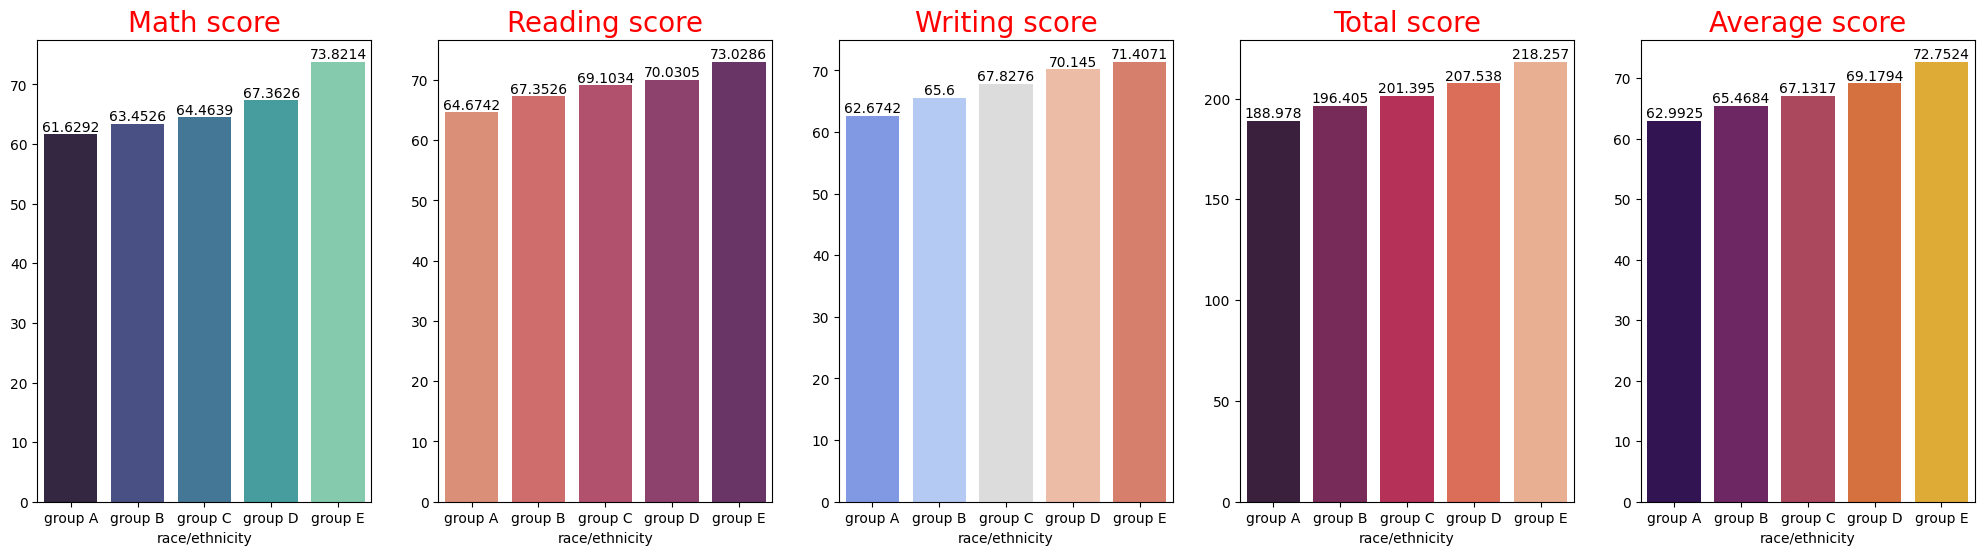

In [184]:
f,ax = plt.subplots(1,5,figsize=(25,6))  
sns.barplot(x=race_group['math score'].index,y=race_group['math score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#FF0000',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10) 
    
sns.barplot(x=race_group["reading score"].index,y=race_group['reading score'].values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#FF0000',size=20 )

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10) 
    
sns.barplot(x=race_group["writing score"].index,y=race_group['writing score'].values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#FF0000',size=20 )

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10) 
    
sns.barplot(x=race_group["Total Score"].index,y=race_group['Total Score'].values,palette='rocket',ax=ax[3])
ax[3].set_title('Total score',color='#FF0000',size=20 )

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=10) 
    
sns.barplot(x=race_group["Average"].index,y=race_group['Average'].values,palette='inferno',ax=ax[4])
ax[4].set_title('Average score',color='#FF0000',size=20 )

for container in ax[4].containers:
    ax[4].bar_label(container,color='black',size=10)




In [170]:
race_group["math score"].values

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

In [204]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [188]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

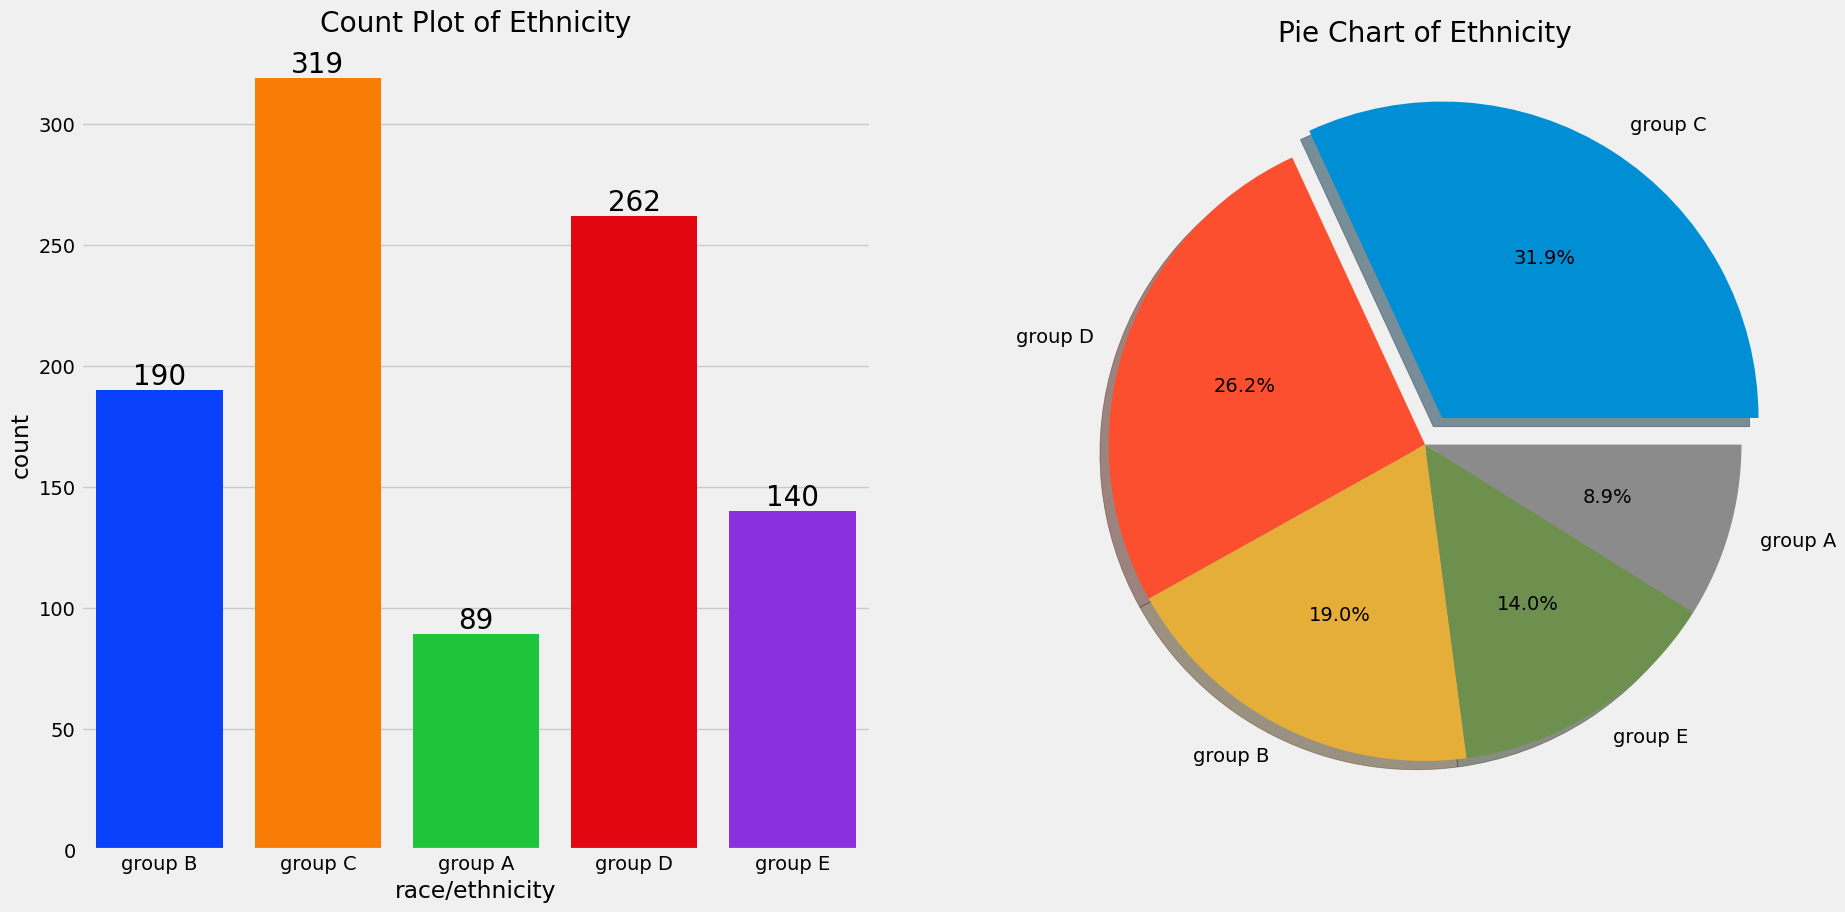

In [231]:

f,ax=plt.subplots(1,2,figsize=(20,10)) 
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Count Plot of Ethnicity')
ax[1].set_title('Pie Chart of Ethnicity')  
plt.show()  

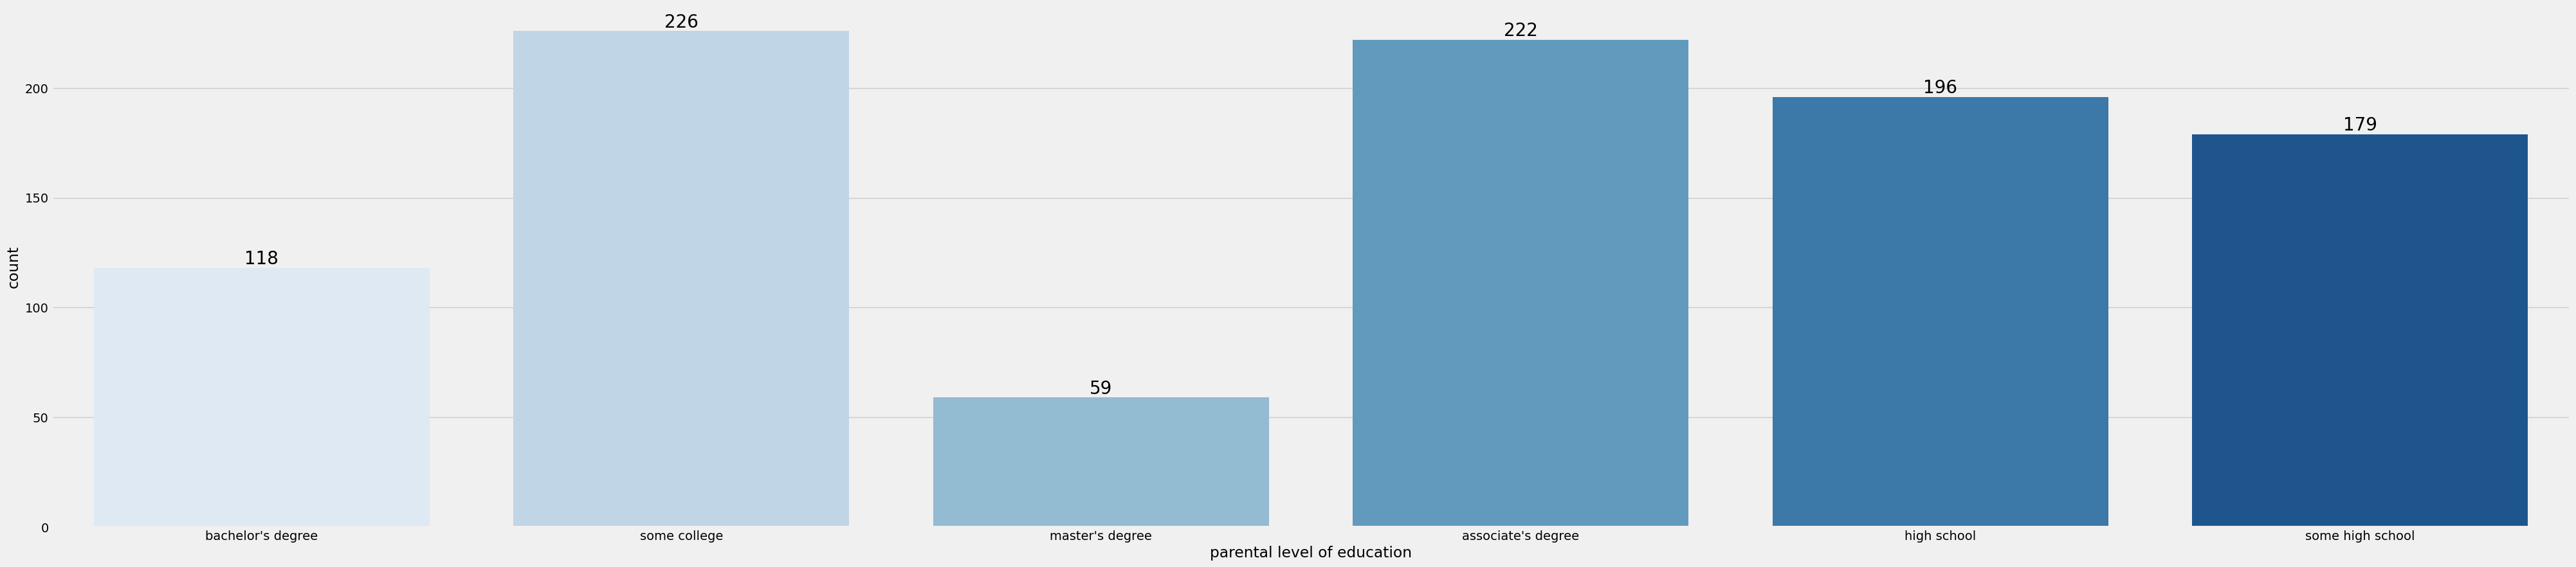

In [245]:
f,ax = plt.subplots(1,1,figsize = (45,10))
sns.countplot(x=df['parental level of education'],ax = ax,data = df,palette='Blues')  

for container in ax.containers:
    ax.bar_label(container,color='black',size=20)
plt.show() 

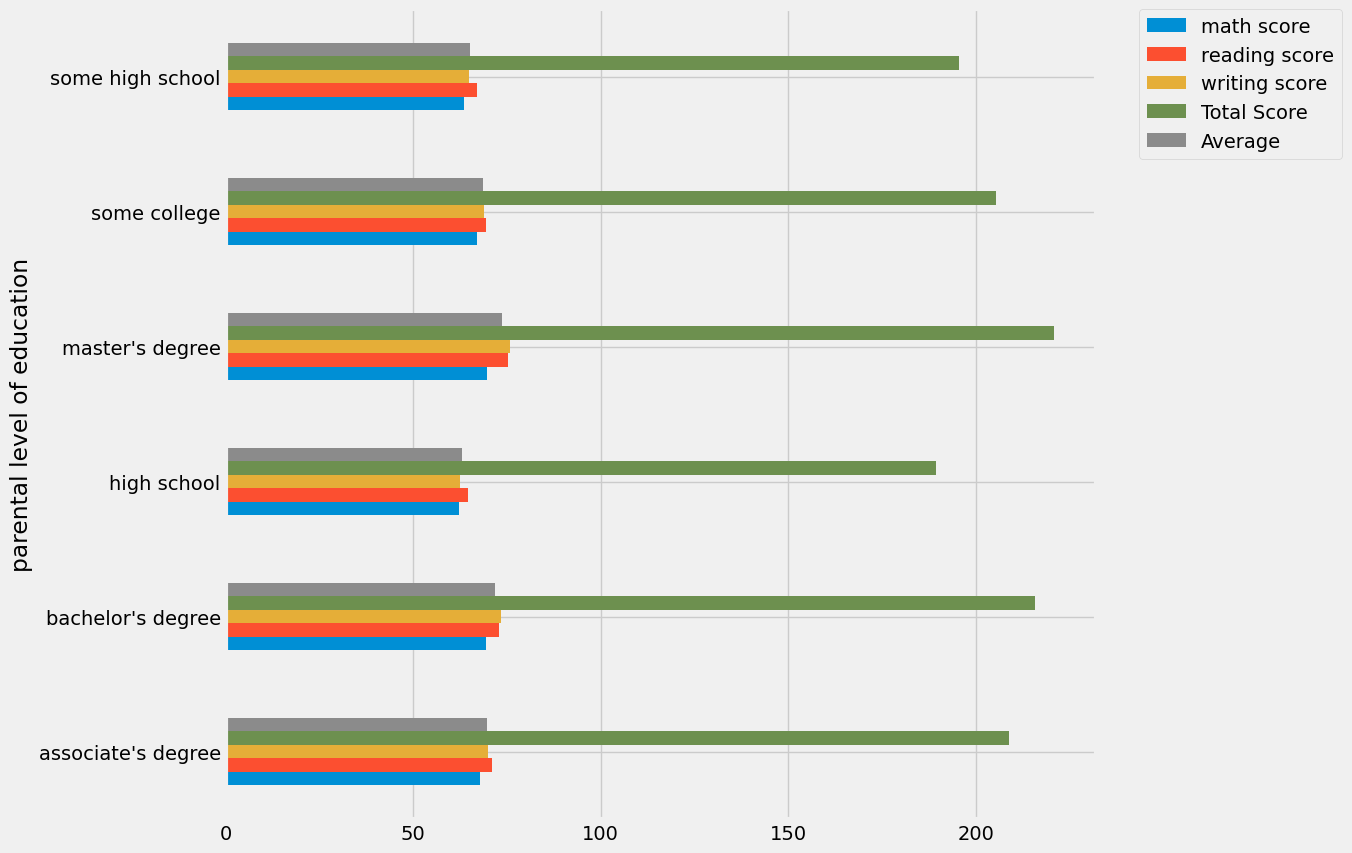

In [225]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
sns.countplot

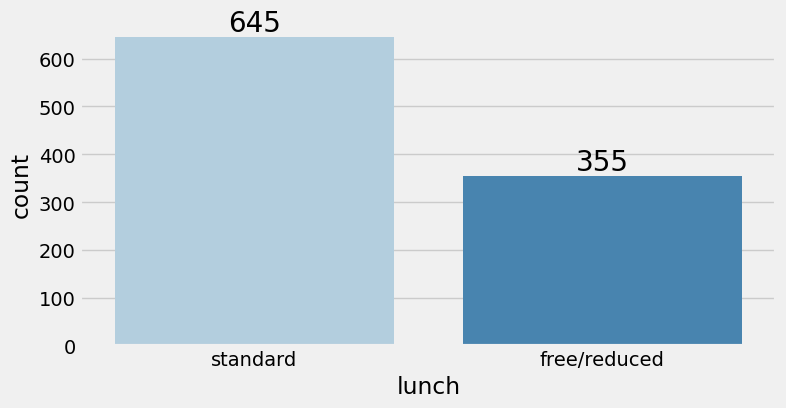

In [251]:
f,ax = plt.subplots(1,1,figsize = (8,4))
sns.countplot(x=df['lunch'],ax = ax,data = df,palette='Blues')  

for container in ax.containers:
    ax.bar_label(container,color='black',size=20)
plt.show() 

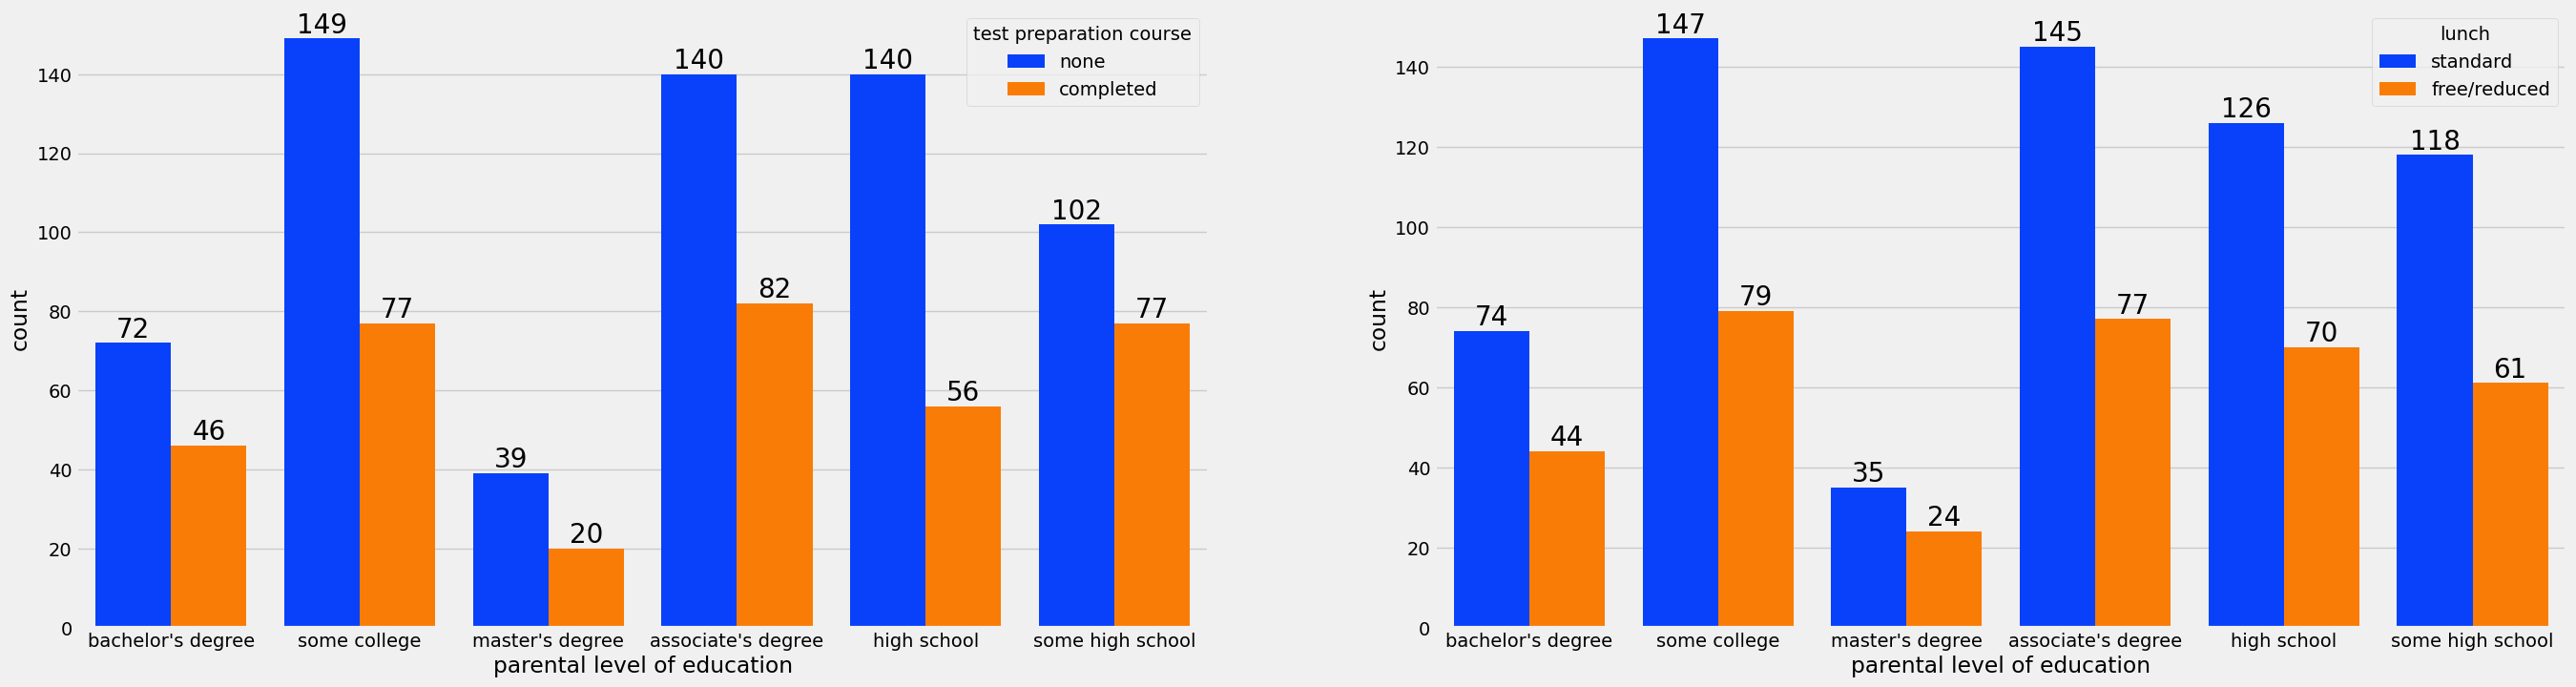

In [257]:
f,ax = plt.subplots(1,2,figsize = (30,8)) 
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0]) 
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20) 
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1]) 
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: title={'center': 'free lunch in masters degree'}, xlabel='Average', ylabel='Count'>

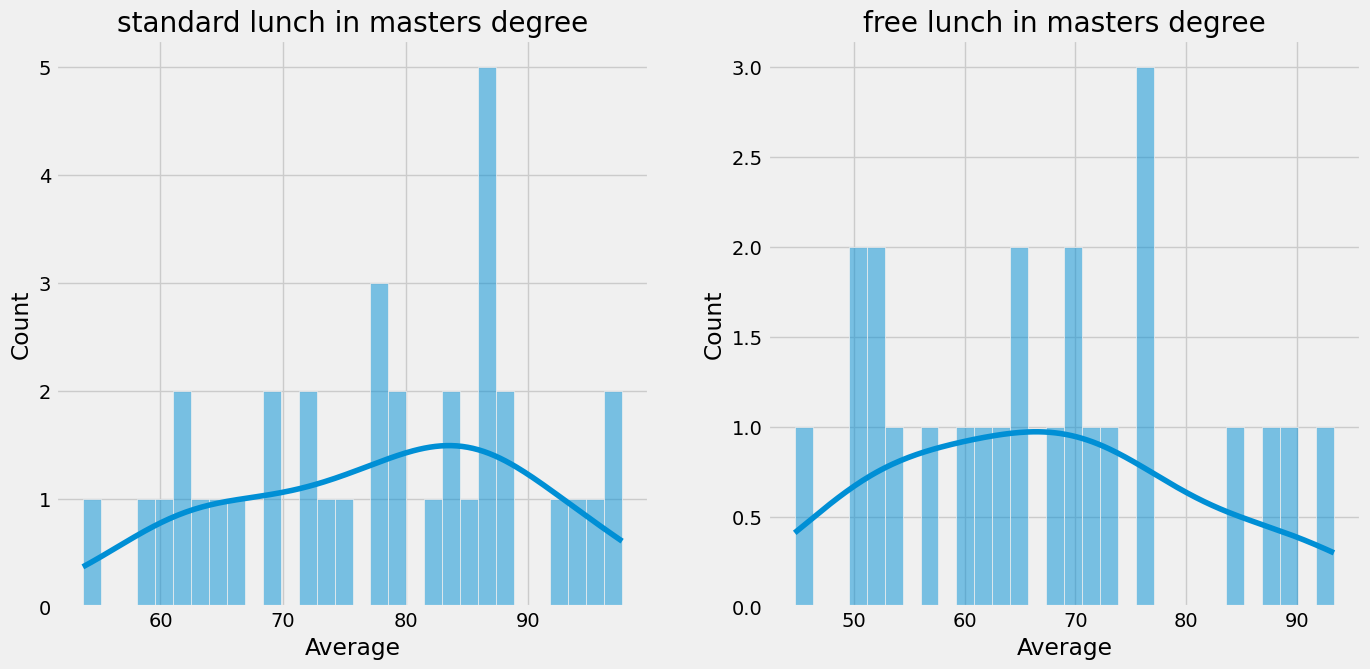

In [282]:
plt.subplots(1,2,figsize = (15,7)) 
plt.subplot(121).set_title('standard lunch in masters degree')
sns.histplot(data = df[(df['parental level of education'] == "master's degree") & (df['lunch'] == "standard")],x='Average',bins = 30,kde = True) 
plt.subplot(122).set_title('free lunch in masters degree')
sns.histplot(data = df[(df['parental level of education'] == "master's degree") & (df['lunch'] == "free/reduced")],x='Average',bins = 30,kde = True)

In [270]:
data = df[(df['parental level of education'] == "master's degree") & (df['lunch'] == "standard")]


In [272]:
len(data)

35

In [274]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [278]:
data = df[(df['parental level of education'] == "master's degree") & (df['lunch'] == "free/reduced")]

In [279]:
data 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
18,male,group C,master's degree,free/reduced,completed,46,42,46,134,44.666667
25,male,group A,master's degree,free/reduced,none,73,74,72,219,73.000000
32,female,group E,master's degree,free/reduced,none,56,72,65,193,64.333333
162,male,group B,master's degree,free/reduced,none,49,53,52,154,51.333333
167,female,group B,master's degree,free/reduced,completed,58,76,78,212,70.666667
178,female,group B,master's degree,free/reduced,completed,52,70,62,184,61.333333
180,male,group C,master's degree,free/reduced,completed,62,68,75,205,68.333333
225,female,group E,master's degree,free/reduced,none,45,56,54,155,51.666667
259,female,group C,master's degree,free/reduced,completed,65,81,81,227,75.666667
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333


<Axes: xlabel='lunch', ylabel='writing score'>

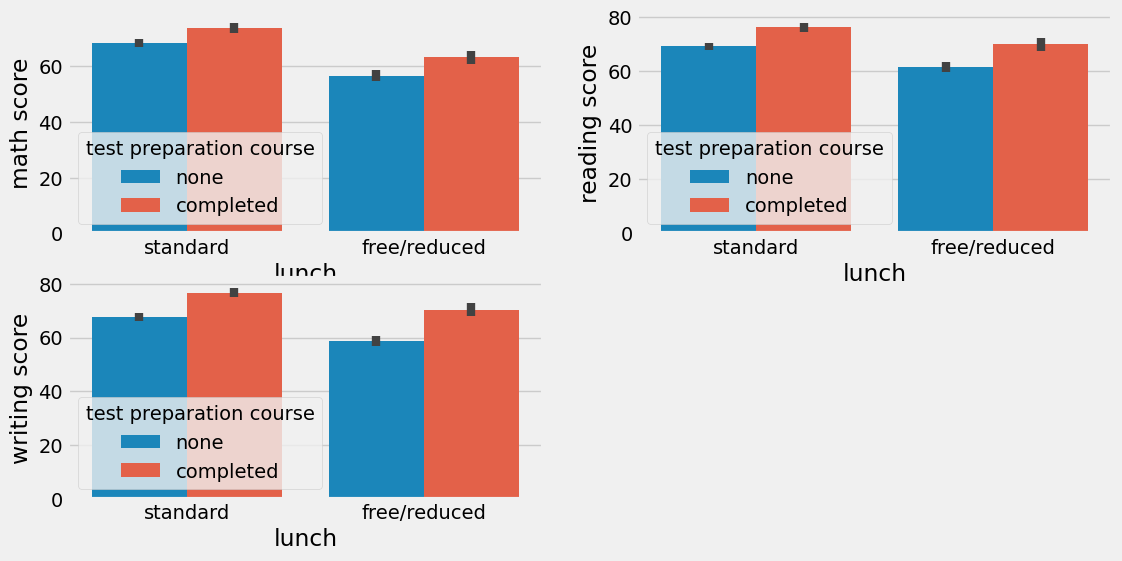

In [283]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course']) 

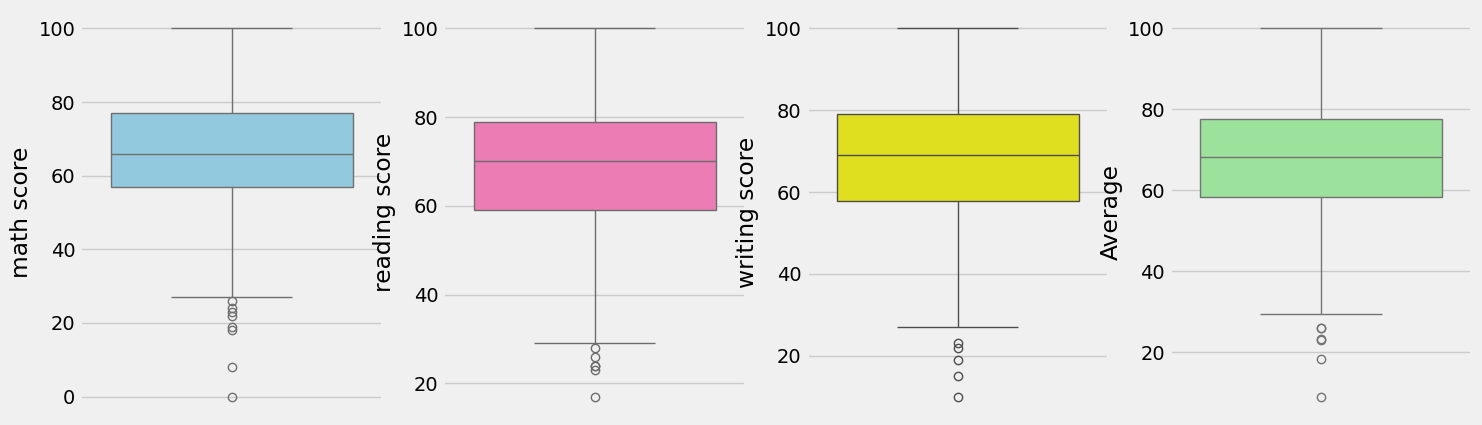

In [285]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show() 